[View in Colaboratory](https://colab.research.google.com/github/Thanatoz-1/WordEmbedding-Modelling/blob/master/Hinglish_vocab_builder.ipynb)

In [0]:
!git clone https://github.com/HarshTrivedi/HinglishSentiment.git
!git clone https://github.com/toprakozturk/language-classifier

In [0]:
!mv ./HinglishSentiment/new_data ./

In [0]:
!pip install gensim

In [0]:
import os
import re
import bs4
import pandas as pd
import numpy
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn
import sklearn
import keras
import gensim
import nltk
import numpy as np
import seaborn as sns

In [0]:
sentences=[]
for i in sorted(os.listdir('./new_data')):
  with open(os.path.join('./new_data',i)) as f:
    temp=f.readlines()[1:]
    sentences+=temp

for i,sentence in enumerate(sentences):
  sentences[i]=re.sub("[^ a-zA-Z.]", "", sentence).lower()

In [22]:
sentences[:10]

['',
 'paisa fek tamasaha dekh usse jaise hi dosti ho jaaye us par paisa kharch karna shuru kar do chahe apne doston se paise udhaar magne padein maang lo aur kisi raaja ki tarah us par paisa udao baad mein tumhara baaja bajega iski  taka zimmedari hamari.',
 'duniya ka sabse shareef insaan banne ka dhong karo chahe tum kitne hi bade dhokebaaz kyun na ho kintu facebook mein ladki se dosti hote hi usse aise baatein karo jaise tum is duniya ke sabse shareef insaan ho. aur tum hi uske sapho ke rajkumar ho.',
 'din mein kam se kam  angrezi gaane share karo chahe tumhe angrezi gaane samajh mein na aate hon phir bhi din mein kam se kam  angrezi gaane post karte jao use lagna chahiye ki tum lambi race ke ghode ho.',
 'mobile number milte hi  ka recharge karva do jaise hi dosti aage bade aur ladki apna number tumhe de sabse pehle uska phone kam se kam  se recharge kara daalo. paise mein badi taakat hoti hai bhakton uske baad dekho kamaal.',
 'baaton ke sher bano chahe tum ek number ke darpoke 

In [23]:
hinglish_vocab=[]
hinglish_train=[]
for sentence in sentences:
  hinglish_vocab+=[i for i in gensim.summarization.textcleaner.tokenize_by_word(sentence)]
  if len(sentence)!=0:
    hinglish_train.append([i for i in gensim.summarization.textcleaner.tokenize_by_word(sentence)])
len(hinglish_vocab)

331399

In [24]:
dataset=[]
for sentence in sentences:
  if len(sentence)!=0:
    dataset+=[sentence]
len(dataset)

4504

In [0]:
labels = np.ones(len(dataset))

In [26]:
df=pd.DataFrame()
df['labels']=labels
df['text']=dataset
df.head()

,labels,text
0,1.0,paisa fek tamasaha dekh usse jaise hi dosti ho...
1,1.0,duniya ka sabse shareef insaan banne ka dhong ...
2,1.0,din mein kam se kam angrezi gaane share karo ...
3,1.0,mobile number milte hi ka recharge karva do j...
4,1.0,baaton ke sher bano chahe tum ek number ke dar...


In [0]:
with open(os.path.join('./HinglishSentiment','stopwords','stopwords_list.txt')) as f:
  hinglish_stopwords=f.readlines()[:-2]
for i,word in enumerate(hinglish_stopwords):
  hinglish_stopwords[i]=word[:-1]

In [0]:
hinglish_w2v=[]
for lst in hinglish_train:
  hinglish_w2v.append([i for i in lst if not i in hinglish_stopwords])

In [28]:
import logging
logging.basicConfig(format='%(asctime)s: %(message)s', level=logging.INFO)

num_features = 100    # Word vector dimensionality                      
min_word_count = 40   # Minimum word count                        
num_workers = 2       # Number of threads to run in parallel
context = 10          # Context window size                                                                                    
downsampling = 1e-3   # Downsample setting for frequent words

from gensim.models import word2vec
print("Training model...")
model = word2vec.Word2Vec(hinglish_w2v, 
                          workers=num_workers,
                          size=num_features, 
                          min_count = min_word_count, 
                          window = context, 
                          sample = downsampling
                         )

# If you don't plan to train the model any further, calling 
# init_sims will make the model much more memory-efficient.
model.init_sims(replace=True)

# It can be helpful to create a meaningful model name and 
# save the model for later use. You can load it later using Word2Vec.load()
model_name = "300features_40minwords_10context.w2v"
model.save(model_name)

2018-09-02 00:53:54,725: collecting all words and their counts
2018-09-02 00:53:54,726: PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2018-09-02 00:53:54,801: collected 28182 word types from a corpus of 232269 raw words and 4504 sentences
2018-09-02 00:53:54,803: Loading a fresh vocabulary
2018-09-02 00:53:54,852: effective_min_count=10 retains 3192 unique words (11% of original 28182, drops 24990)
2018-09-02 00:53:54,854: effective_min_count=10 leaves 179765 word corpus (77% of original 232269, drops 52504)
2018-09-02 00:53:54,869: deleting the raw counts dictionary of 28182 items
2018-09-02 00:53:54,871: sample=0.001 downsamples 40 most-common words
2018-09-02 00:53:54,872: downsampling leaves estimated 154830 word corpus (86.1% of prior 179765)
2018-09-02 00:53:54,886: estimated required memory for 3192 words and 100 dimensions: 4149600 bytes
2018-09-02 00:53:54,886: resetting layer weights
2018-09-02 00:53:54,919: training model with 2 workers on 3192 vocabulary

Training model...


2018-09-02 00:53:55,190: worker thread finished; awaiting finish of 1 more threads
2018-09-02 00:53:55,200: worker thread finished; awaiting finish of 0 more threads
2018-09-02 00:53:55,201: EPOCH - 1 : training on 232269 raw words (154883 effective words) took 0.3s, 556393 effective words/s
2018-09-02 00:53:55,471: worker thread finished; awaiting finish of 1 more threads
2018-09-02 00:53:55,478: worker thread finished; awaiting finish of 0 more threads
2018-09-02 00:53:55,480: EPOCH - 2 : training on 232269 raw words (154906 effective words) took 0.3s, 566227 effective words/s
2018-09-02 00:53:55,751: worker thread finished; awaiting finish of 1 more threads
2018-09-02 00:53:55,756: worker thread finished; awaiting finish of 0 more threads
2018-09-02 00:53:55,758: EPOCH - 3 : training on 232269 raw words (154944 effective words) took 0.3s, 568766 effective words/s
2018-09-02 00:53:56,019: worker thread finished; awaiting finish of 1 more threads
2018-09-02 00:53:56,025: worker thread

In [29]:
print(len(model.wv.vocab))

3192


In [30]:
model.similar_by_word('dost')

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similar_by_word` (Method will be removed in 4.0.0, use self.wv.similar_by_word() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python2.7/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[(u'jana', 0.9998114109039307),
 (u'sir', 0.9998099207878113),
 (u'kitana', 0.999800980091095),
 (u'jagah', 0.9997974038124084),
 (u'sidani', 0.99979567527771),
 (u'hansi', 0.9997937083244324),
 (u'chhod', 0.9997924566268921),
 (u'rakh', 0.9997860193252563),
 (u'pahunch', 0.9997847676277161),
 (u'pahuncha', 0.9997819066047668)]

In [0]:
import sklearn.manifold
tsne = sklearn.manifold.TSNE(n_components=2, random_state=0)
all_word_vectors_matrix = model.wv.vectors
all_word_vectors_matrix_2d = tsne.fit_transform(all_word_vectors_matrix)

In [0]:
points = pd.DataFrame(
    [
        (word, coords[0], coords[1])
        for word, coords in [
            (word, all_word_vectors_matrix_2d[model.wv.vocab[word].index])
            for word in model.wv.vocab
        ]
    ],
    columns=["word", "x", "y"]
)

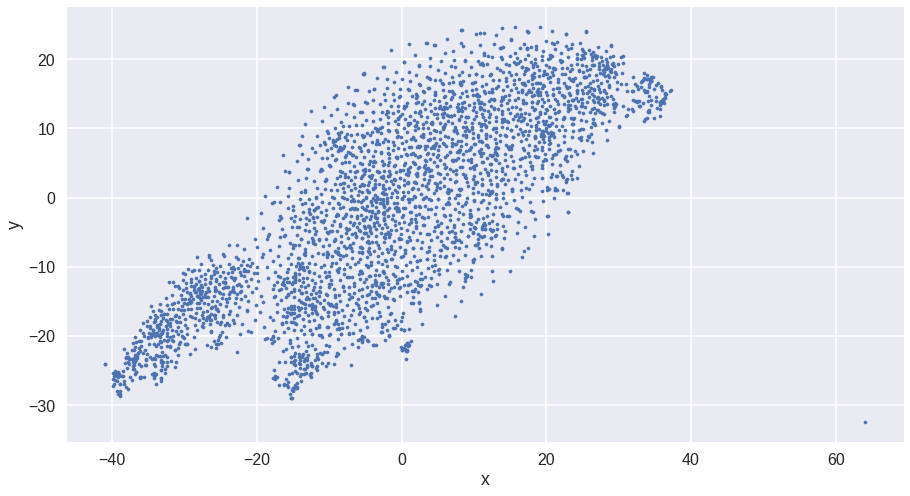

In [33]:
sns.set_context("poster")
points.plot.scatter("x", "y", s=10, figsize=(15, 8))